## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
import simplekml
from pykml import parser
import fiona

## Work directory

In [2]:
work_dir = "../Data/maharashtra_state_data/"

## Reading file

In [3]:
fiona.drvsupport.supported_drivers['KML'] = 'rw'
kml_gdf = gpd.read_file(work_dir + 'Hyderabad_map.kml', driver='KML')

In [4]:
kml_gdf

,Name,Description,geometry
0,Hyderabad,,"POLYGON Z ((78.47089 17.40028 0.00000, 78.4708..."


In [5]:
# Reading Shapefile

maharashtra_gdf = gpd.read_file(work_dir + '\maharashtra_state_datamaharashtra_state_file.shp')

## Checking columns of KML file

In [6]:
kml_gdf.columns

Index(['Name', 'Description', 'geometry'], dtype='object')

## Converting 'Polygon' values of geometry column into 'Polygon Z' values of shapefile

In [7]:
maharashtra_gdf['geometry'] = maharashtra_gdf['geometry'].apply(lambda p: Polygon([(x, y, 0) for x, y in p.exterior.coords]))

## Creating required columns in KML file

In [8]:
kml_gdf['DST_ID'] = 483
kml_gdf['DISTRICT'] = 'Hyderabad'
kml_gdf['STATE'] = 'Telangana'
kml_gdf['POPULATION'] = 90000
kml_gdf['EDUCATION%'] = 100

## Selecting and arranging only required columns

In [9]:
kml_gdf = kml_gdf[['DST_ID', 'DISTRICT', 'STATE', 'POPULATION', 'EDUCATION%', 'geometry']]

In [11]:
maharashtra_gdf.columns

Index(['DST_ID', 'DISTRICT', 'STATE', 'geometry'], dtype='object')

## Plotting Marashtra map before merge

<Axes: >

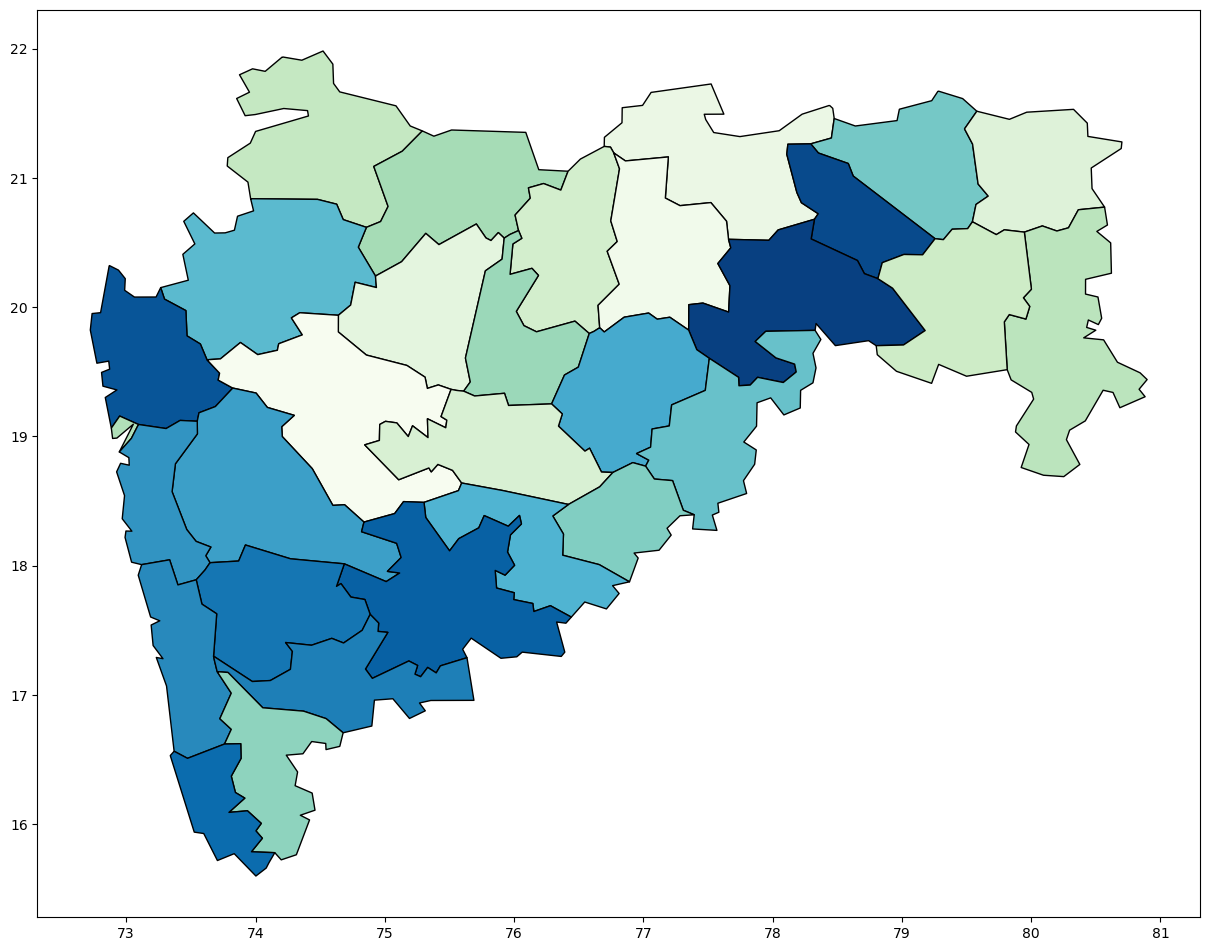

In [12]:
maharashtra_gdf.plot(figsize = (15,15), column = 'DISTRICT', cmap = 'GnBu', edgecolor = 'black')

## Merging both files

In [13]:
maharashtra_gdf = maharashtra_gdf.merge(kml_gdf, how = 'outer')

## Checking unique values of 'DISTRICT' column

In [14]:
maharashtra_gdf['DISTRICT'].unique()

array(['Dhule', 'Amravati', 'Nagpur', 'Bhandara', 'Jalgaon', 'Wardha',
       'Buldana', 'Akola', 'Nashik', 'Gadchiroli', 'Yavatmal',
       'Chandrapur', 'Aurangabad', 'Jalna', 'Thane', 'Ahmadnagar',
       'Parbhani', 'Nanded', 'Pune', 'Bid', 'Greater Bombay', 'Raigarh',
       'Latur', 'Osmanabad', 'Solapur', 'Satara', 'Ratnagiri', 'Sangli',
       'Kolhapur', 'Sindhudurg', 'Hyderabad'], dtype=object)

## Plotting figure

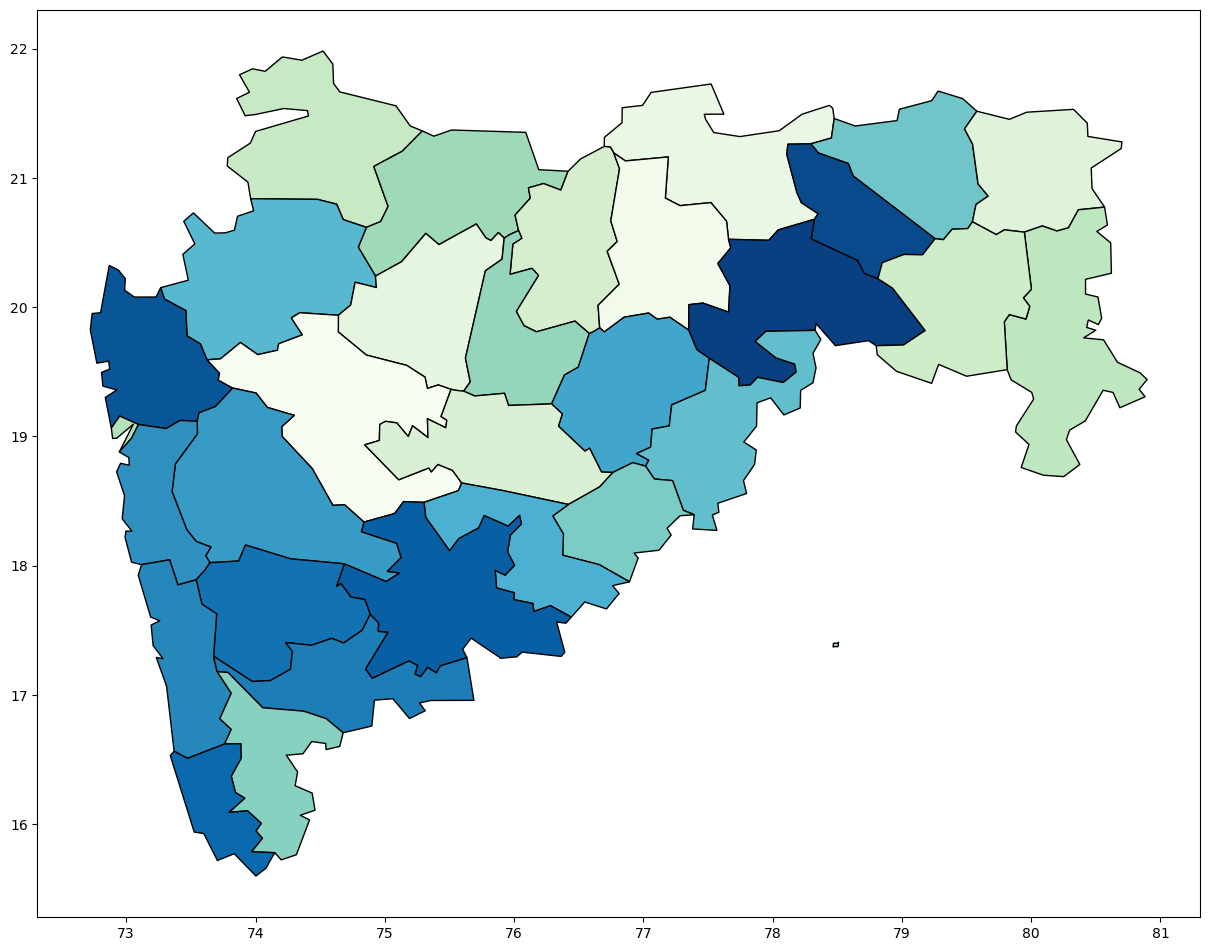

In [17]:
ax = maharashtra_gdf.plot(figsize = (15,15), column = 'DISTRICT', cmap = 'GnBu',facecolor = '#00000050', edgecolor = 'black')
# ax.set_xlim(72,81)
# ax.set_ylim(15,22.5)